In [1]:
from mathism import sigmoid, binaryCrossEntropyLoss


In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.X = None
        self.y = None
        self.theta = None

    def fit_gradientDescent(self, X: list[list[float | int]], y: list[float | int]):
        """
        Steps:
        1. Add bias
        2. Initialize theta to zero
        3. Gradient Descent
            a. calculate predictions(y-hat)
            b. compute gradient
            c. update theta
        """
        self.X = X
        
        X_bias = [[1] + row for row in X]
        m = len(X_bias)  
        n = len(X_bias[0])  

        self.theta = [0.0] * n

        for iteration in range(self.iterations):
            z = [sum(self.theta[j] * X_bias[i][j] for j in range(n)) for i in range(m)]
            y_hat = sigmoid(z)
            
            gradient = [0.0] * n
            for j in range(n):
                gradient[j] = (1 / m) * sum((y_hat[i] - y[i]) * X_bias[i][j] for i in range(m))
            
            self.theta = [self.theta[j] - self.learning_rate * gradient[j] for j in range(n)]
    
    def predict_probabilities(self, X: list[list[float | int]]):
        X_bias = [[1] + row for row in X]
        # z = X * theta
        z = [sum(self.theta[j] * X_bias[i][j] for j in range(len(self.theta))) 
             for i in range(len(X_bias))]
        
        return sigmoid(z)
    
    def predict(self, X: list[list[float | int]], threshold=0.5):
        probabilities = self.predict_probabilities(X)
        return [1 if p >= threshold else 0 for p in probabilities]
    

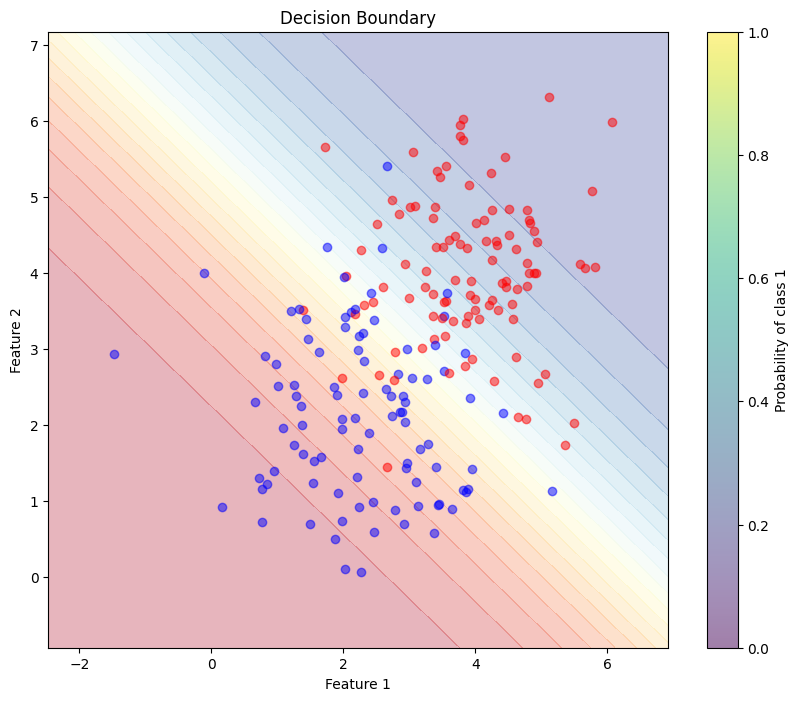

Test Accuracy: 87.50%


In [3]:
from math import exp, log
import matplotlib.pyplot as plt
import random


random.seed(42)

def generate_synthetic_data(n_samples=100):
    """Generate synthetic data for binary classification"""
    X = []
    y = []
    
    for _ in range(n_samples):
        # Generate class 0 points (cluster centered at (2, 2))
        if random.random() < 0.5:
            x1 = random.gauss(2, 1)
            x2 = random.gauss(2, 1)
            y.append(0)
        # Generate class 1 points (cluster centered at (4, 4))
        else:
            x1 = random.gauss(4, 1)
            x2 = random.gauss(4, 1)
            y.append(1)
        X.append([x1, x2])
    
    return X, y

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    """Plot the decision boundary and data points"""
    # Set up the mesh grid
    x_min, x_max = min(x[0] for x in X) - 1, max(x[0] for x in X) + 1
    y_min, y_max = min(x[1] for x in X) - 1, max(x[1] for x in X) + 1
    
    # Create proper mesh grid
    step = 0.1
    x_steps = int((x_max - x_min) / step)
    y_steps = int((y_max - y_min) / step)
    
    # Create coordinate matrices
    xx = [x_min + i * step for i in range(x_steps)]
    yy = [y_min + i * step for i in range(y_steps)]
    
    # Create all combinations of points
    mesh_points = []
    for y_val in yy:
        for x_val in xx:
            mesh_points.append([x_val, y_val])
    
    # Get predictions
    Z = model.predict_probabilities(mesh_points)
    
    # Reshape Z to match the mesh grid dimensions
    Z = [Z[i:i + x_steps] for i in range(0, len(Z), x_steps)]
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.title(title)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z,
                levels=20,
                cmap='RdYlBu',
                alpha=0.3)
    
    # Plot data points
    for i in range(len(X)):
        color = 'red' if y[i] == 1 else 'blue'
        plt.scatter(X[i][0], X[i][1], c=color, alpha=0.5)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Probability of class 1')

def main():
    # Generate synthetic dataset
    X, y = generate_synthetic_data(n_samples=200)
    
    # Split into train and test sets (80-20 split)
    split_idx = int(0.8 * len(X))
    X_train = X[:split_idx]
    y_train = y[:split_idx]
    X_test = X[split_idx:]
    y_test = y[split_idx:]
    
    # Create and train the model
    model = LogisticRegression(learning_rate=0.1, iterations=1000)
    
    # Train the model
    model.fit_gradientDescent(X_train, y_train)
    
    # Calculate and plot training loss
    train_losses = []
    iterations = []
    for i in range(0, 1000, 100):
        predictions = model.predict_probabilities(X_train)
        loss = binaryCrossEntropyLoss(y_train, predictions)
        train_losses.append(loss)
        iterations.append(i)
    
    
    # Plot decision boundary
    plot_decision_boundary(X, y, model)
    plt.show()
    
    # Calculate and print accuracy
    test_predictions = model.predict(X_test)
    accuracy = sum(1 for i in range(len(y_test)) if test_predictions[i] == y_test[i]) / len(y_test)
    print(f"Test Accuracy: {accuracy:.2%}")

if __name__ == "__main__":
    main()